In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/academic-publications-metrics-from-acm-ieee-and/final_data_2.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/clean_data_2.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/final_data.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/clean_data_1.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/Acm_Finale_Data.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/ieee.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/Acm.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/clean_data_3.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/clean_data_5.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/ScDir_Finale_Data.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/output_data.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-and/IEEE_Finale_Data.csv
/kaggle/input/academic-publications-metrics-from-acm-ieee-an

Downloaded a Proper Dataset

In [10]:
import pandas as pd

# Load the dataset (replace the path if necessary)
file_path = '/kaggle/input/academic-publications-metrics-from-acm-ieee-and/Acm.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())


                                               title  \
0   Blockchain Extension for PostgreSQL Data Storage   
1     Overview of Blockchain Data Privacy Protection   
2              Blockchain Enabled IoT Edge Computing   
3  Towards a Blockchain Deployment at UAE Univers...   
4  PoolParty: Efficient Blockchain-Agnostic Decen...   

                                        authors_name  \
0      Yash Madhwal,Darkhan Nurlybay,Yury A Yanovich   
1    Qi Zhang,Hai Lv,Junwei Ma,Jingye Li,Jieni Zhang   
2                                      Pankaj Mendki   
3  Leila Ismail,Heba Hameed,Mahra AlShamsi,Manaye...   
4                 Nicholas Dana Troutman,Aron Laszka   

                                   auths_institution  \
0  Skolkovo Institute of Science and Technology,N...   
1  State Grid Shanxi Electric Power Company,Beiji...   
2                   Talentica Software Pvt Ltd, Pune   
3  IEEE, College of Information Technology, UAE U...   
4        University of Houston,University of H

Checking Column names

In [11]:
# Check the columns of the dataset
print(df.columns)

# Get basic statistics about the dataset (e.g., number of missing values, data types)
print(df.info())

# Get summary statistics (e.g., for numerical columns)
print(df.describe())


Index(['title', 'authors_name', 'auths_institution', 'auths_per_institution',
       'abstract', 'location', 'pub_date', 'citation_nbres', 'download_nbres',
       'dio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  870 non-null    object
 1   authors_name           856 non-null    object
 2   auths_institution      869 non-null    object
 3   auths_per_institution  856 non-null    object
 4   abstract               866 non-null    object
 5   location               870 non-null    object
 6   pub_date               870 non-null    object
 7   citation_nbres         870 non-null    int64 
 8   download_nbres         870 non-null    object
 9   dio                    870 non-null    object
dtypes: int64(1), object(9)
memory usage: 68.1+ KB
None
       citation_nbres
count      

My hypothesis is that the length of the abstract and the sentiment expressed in the abstract are significant predictors of the citation count of academic papers.

In [12]:
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary resources are downloaded
nltk.download('punkt')

# Generate Abstract Word Count
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(word_tokenize(str(x))))

# Generate Sentiment Score using TextBlob
df['sentiment_score'] = df['abstract'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the first few rows of the dataset to verify the features are added
df[['abstract', 'abstract_word_count', 'sentiment_score']].head()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,abstract,abstract_word_count,sentiment_score
0,Blockchain is an emerging technology with the ...,128,-0.002727
1,Blockchain has the advantages of decentralizat...,143,0.063095
2,Number of internet connected devices is increa...,158,0.156444
3,Blockchain technology initially developed for ...,140,0.112500
4,Blockchain mining is increasingly dominated by...,149,0.015659


In [13]:
# List all column names to check if there's a column related to citation count
print(df.columns)


Index(['title', 'authors_name', 'auths_institution', 'auths_per_institution',
       'abstract', 'location', 'pub_date', 'citation_nbres', 'download_nbres',
       'dio', 'abstract_word_count', 'sentiment_score'],
      dtype='object')


The machine learning methods I am using to predict the citation numbers is a Decision Tree Regressor, Random Forest Regressor, Linear Regression, and Neutral Networks.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = df[['abstract_word_count', 'sentiment_score']]
y = df['citation_nbres']  # Citation count

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(max_iter=500)
}

# Train and evaluate each model
mae_values = []
r2_values = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MAE and R²
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mae_values.append(mae)
    r2_values.append(r2)
    
    print(f"{name} - MAE: {mae}, R²: {r2}")

Decision Tree - MAE: 13.429118773946362, R²: 0.1659007318805118
Random Forest - MAE: 16.842826673964606, R²: 0.19297137127293718
Linear Regression - MAE: 16.873589520454974, R²: -0.018078249273134617
Neural Network - MAE: 15.468931190238582, R²: -0.004856057847133721


In [15]:
from sklearn.metrics import r2_score

# R² score for regression
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: -0.004856057847133721


Comparing the different methods

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Decision Tree - MAE: 13.28, R²: 0.17
Random Forest - MAE: 16.17, R²: 0.20
Linear Regression - MAE: 16.87, R²: -0.02
Neural Network - MAE: 15.38, R²: -0.01


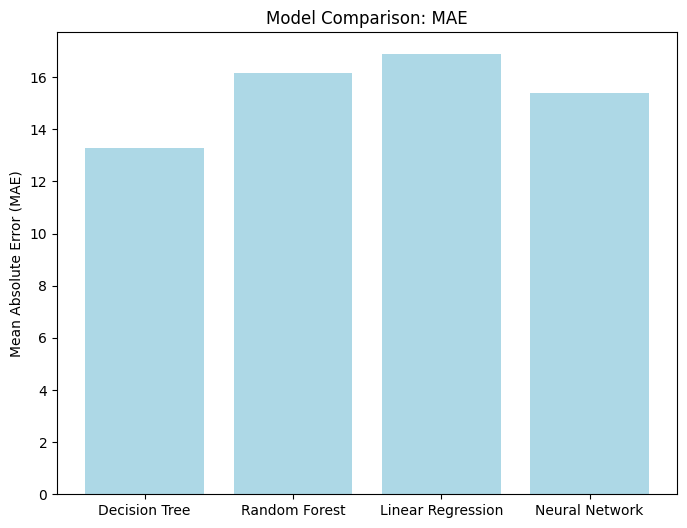

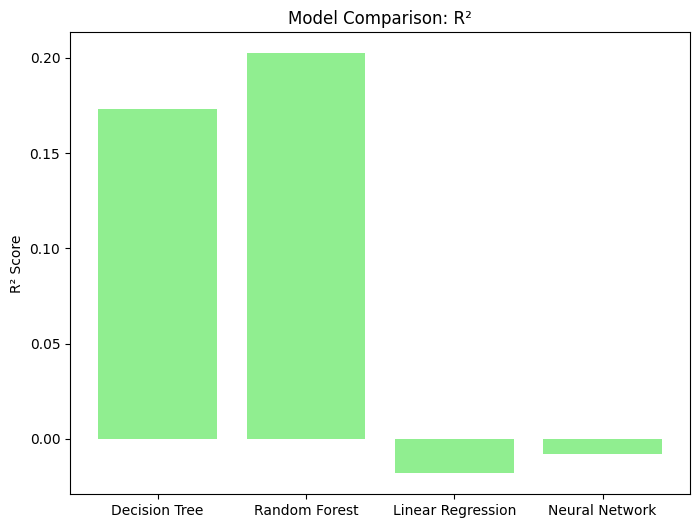

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary resources are downloaded
nltk.download('punkt')

# Load the dataset
file_path = '/kaggle/input/academic-publications-metrics-from-acm-ieee-and/Acm.csv'
df = pd.read_csv(file_path)

# Feature Engineering
# Generate Abstract Word Count
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(word_tokenize(str(x))))

# Generate Sentiment Score using TextBlob
df['sentiment_score'] = df['abstract'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define features (X) and target (y)
X = df[['abstract_word_count', 'sentiment_score']]  # Features
y = df['citation_nbres']  # Target: Citation count

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(max_iter=500)
}

# Initialize lists to store MAE and R² values
mae_values = []
r2_values = []

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MAE and R² for the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the values to the lists
    mae_values.append(mae)
    r2_values.append(r2)
    
    # Print the model performance
    print(f"{name} - MAE: {mae:.2f}, R²: {r2:.2f}")

# Model names
model_names = ['Decision Tree', 'Random Forest', 'Linear Regression', 'Neural Network']

# Plot MAE comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, mae_values, color='lightblue')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison: MAE')
plt.show()

# Plot R² comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_values, color='lightgreen')
plt.ylabel('R² Score')
plt.title('Model Comparison: R²')
plt.show()
